In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

#### Uploading and exploaring data

In [4]:
data = pd.read_csv('data.csv', delimiter=';')

In [5]:
data.head()

,BP,Diet
0,8,fishoil
1,12,fishoil
2,10,fishoil
3,14,fishoil
4,2,fishoil


In [7]:
data['BP'].unique()

array([ 8, 12, 10, 14,  2,  0, -6,  1, -3, -4], dtype=int64)

In [8]:
data['Diet'].unique()

array(['fishoil', 'regularoil'], dtype=object)

In [9]:
data.describe()

,BP
count,14.000000
mean,2.714286
std,6.043796
min,-6.000000
25%,0.000000
50%,1.500000
75%,6.500000
max,14.000000


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   BP      14 non-null     int64 
 1   Diet    14 non-null     object
dtypes: int64(1), object(1)
memory usage: 356.0+ bytes


#### Data grouping

In [22]:
group1 = data[data['Diet'] == 'fishoil']['BP']
group2 = data[data['Diet'] == 'regularoil']['BP']

In [24]:
group1.head()

0     8
1    12
2    10
3    14
4     2
Name: BP, dtype: int64

#### Mean, variance, median

Group1 is Fishoil, Group2 is Regularoil

In [25]:
mean1, var1, median1 = group1.mean(), group1.var(), group1.median()
print(f'Mean for group1:\n{mean1}\n\nVariance (rozptyl) for group1:\n{var1}\n\nMedian for group1:\n{median1} ')

Mean for group1:
6.571428571428571

Variance (rozptyl) for group1:
34.285714285714285

Median for group1:
8.0 


In [26]:
mean2, var2, median2 = group2.mean(), group2.var(), group2.median()

print(f'Mean for group2:\n{mean2}\n\nVariance (rozptyl) for group2:\n{var2}\n\nMedian for group2:\n{median2} ')

Mean for group2:
-1.1428571428571428

Variance (rozptyl) for group2:
10.142857142857142

Median for group2:
0.0 


#### Density and distribution function using histogram and empirical distribution function.

In [35]:
# # Fishoil
# plt.hist(group1, bins=10, density=True, alpha=0.5, label='Fishoil')
# ecdf_group1 = stats.cumfreq(group1, numbins=10)
# x_axis_group1 = ecdf_group1.lowerlimit + np.linspace(0, ecdf_group1.binsize*ecdf_group1.cumcount.size, ecdf_group1.cumcount.size)
# plt.plot(x_axis_group1, ecdf_group1.cumcount/ecdf_group1.cumcount.max(), label='Empirical distribution function Fishoil')

# # Regularoil
# plt.hist(group2, bins=10, density=True, alpha=0.5, label='Regularoil')
# ecdf_group2 = stats.cumfreq(group2, numbins=10)
# x_axis_group2 = ecdf_group2.lowerlimit + np.linspace(0, ecdf_group2.binsize*ecdf_group2.cumcount.size, ecdf_group2.cumcount.size)
# plt.plot(x_axis_group2, ecdf_group2.cumcount/ecdf_group2.cumcount.max(), label='Empirical distribution function Regularoil')

# plt.legend()
# plt.show()

In [30]:
# # Fishoil pravdepadobnoatni husrota
# kde_group1 = stats.gaussian_kde(group1)
# x_group1 = np.linspace(min(group1), max(group1), 100)
# plt.plot(x_group1, kde_group1(x_group1), label='PDF Fishoil')

# # Regularoil
# kde_group2 = stats.gaussian_kde(group2)
# x_group2 = np.linspace(min(group2), max(group2), 100)
# plt.plot(x_group2, kde_group2(x_group2), label='PDF Regularoil')

# plt.legend()
# plt.show()

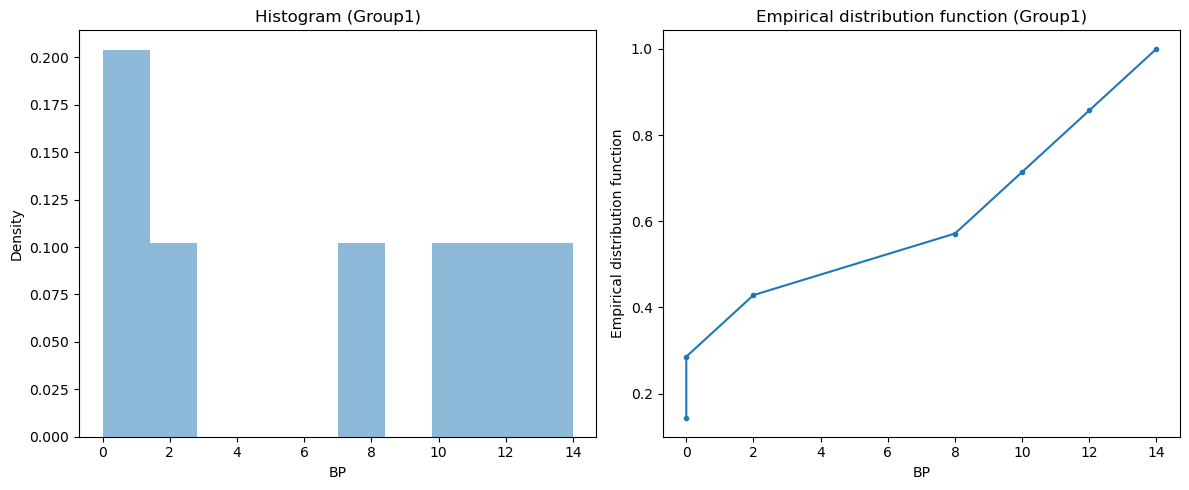

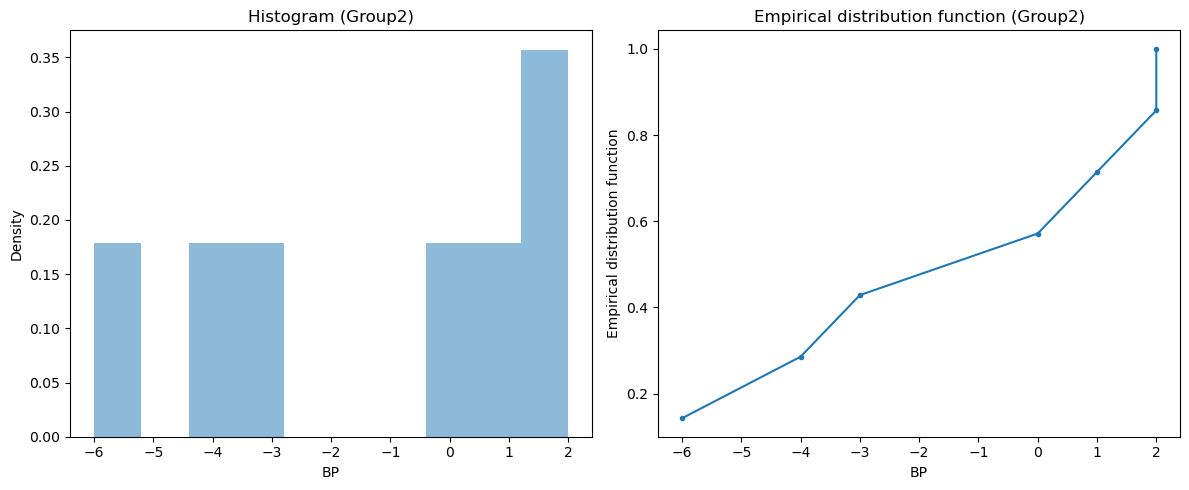

In [37]:
# Group1 - Histogram a Empirical distribution function
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(group1, bins=10, density=True, alpha=0.5, label='Group1')
plt.title('Histogram (Group1)')
plt.xlabel('BP')
plt.ylabel('Density')

plt.subplot(1, 2, 2)
sorted_group1 = np.sort(group1)
y_group1 = np.arange(1, len(group1) + 1) / len(group1)
plt.plot(sorted_group1, y_group1, marker='.', linestyle='-', label='Empirical distribution function Group1')
plt.title('Empirical distribution function (Group1)')
plt.xlabel('BP')
plt.ylabel('Empirical distribution function')

plt.tight_layout()
plt.show()

# Group2 - Histogram a Empirical distribution function
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(group2, bins=10, density=True, alpha=0.5, label='Group2')
plt.title('Histogram (Group2)')
plt.xlabel('BP')
plt.ylabel('Density')

plt.subplot(1, 2, 2)
sorted_group2 = np.sort(group2)
y_group2 = np.arange(1, len(group2) + 1) / len(group2)
plt.plot(sorted_group2, y_group2, marker='.', linestyle='-', label='Empirical distribution function Group2')
plt.title('Empirical distribution function (Group2)')
plt.xlabel('BP')
plt.ylabel('Empirical distribution function')

plt.tight_layout()
plt.show()


With the help of these graphs we can trace the density values (height of the bars in the given intervals). The area of each column corresponds to the proportion of samples in that interval. For example, if the height of the bar is 0.2 and the width of the interval is 1, then 20% of the samples fall into this interval.
The estimate of the distribution function shows the proportion of data less than or equal to a given value. To obtain this fraction at a specific point,  we can find the corresponding value on the y for a given value on the x. If the ECDF is close to 1, it means that most of the data is less than or equal to the target value.


#### Normal, exponential and uniform distribution parameters

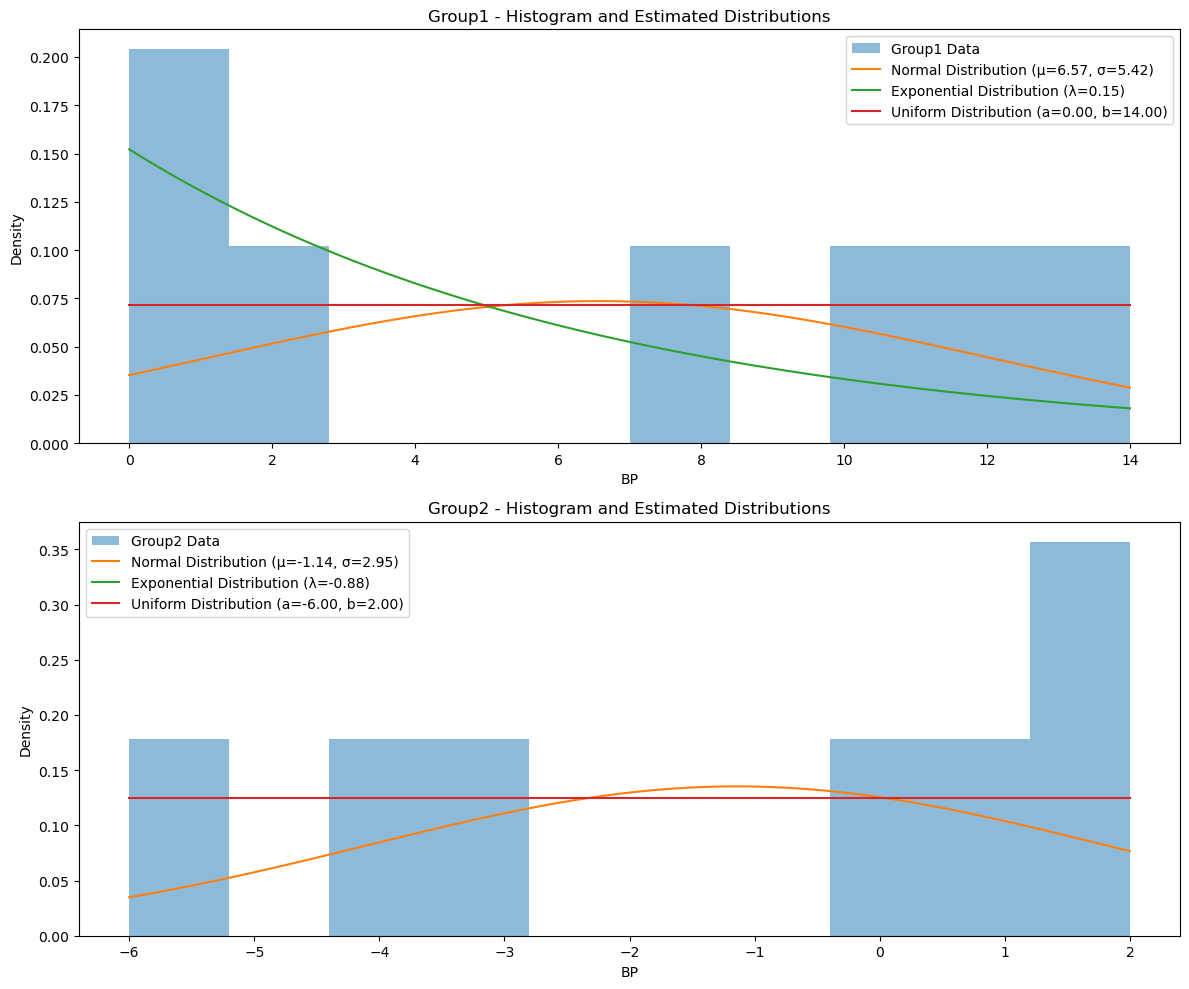

In [43]:
# Parameters for normal distribution
mu_group1, sigma_group1 = np.mean(group1), np.std(group1)
mu_group2, sigma_group2 = np.mean(group2), np.std(group2)

# Parameters for exponential distribution
lambda_group1 = 1 / np.mean(group1) if np.mean(group1) != 0 else 0
lambda_group2 = 1 / np.mean(group2) if np.mean(group2) != 0 else 0


# Parameters for uniform distribution
min_group1, max_group1 = np.min(group1), np.max(group1)
min_group2, max_group2 = np.min(group2), np.max(group2)

# Creating a range for charts
x_group1 = np.linspace(min_group1, max_group1, 100)
x_group2 = np.linspace(min_group2, max_group2, 100)


plt.figure(figsize=(12, 10))

# Group1 - Histogram and Estimated Distributions
plt.subplot(2, 1, 1)
plt.hist(group1, bins=10, density=True, alpha=0.5, label='Group1 Data')
plt.plot(x_group1, stats.norm.pdf(x_group1, mu_group1, sigma_group1), label='Normal Distribution (μ={:.2f}, σ={:.2f})'.format(mu_group1, sigma_group1))
plt.plot(x_group1, stats.expon.pdf(x_group1, scale=1/lambda_group1), label='Exponential Distribution (λ={:.2f})'.format(lambda_group1))
plt.plot(x_group1, stats.uniform.pdf(x_group1, min_group1, max_group1 - min_group1), label='Uniform Distribution (a={:.2f}, b={:.2f})'.format(min_group1, max_group1))
plt.title('Group1 - Histogram and Estimated Distributions')
plt.xlabel('BP')
plt.ylabel('Density')
plt.legend()

# Group2 - Histogram and Estimated Distributions
plt.subplot(2, 1, 2)
plt.hist(group2, bins=10, density=True, alpha=0.5, label='Group2 Data')
plt.plot(x_group2, stats.norm.pdf(x_group2, mu_group2, sigma_group2), label='Normal Distribution (μ={:.2f}, σ={:.2f})'.format(mu_group2, sigma_group2))
plt.plot(x_group2, stats.expon.pdf(x_group2, scale=1/lambda_group2), label='Exponential Distribution (λ={:.2f})'.format(lambda_group2))
plt.plot(x_group2, stats.uniform.pdf(x_group2, min_group2, max_group2 - min_group2), label='Uniform Distribution (a={:.2f}, b={:.2f})'.format(min_group2, max_group2))
plt.title('Group2 - Histogram and Estimated Distributions')
plt.xlabel('BP')
plt.ylabel('Density')
plt.legend()

plt.tight_layout()
plt.show()

For the second group, the exponential separation is not displayed because the arefmetic mean is 0 and in this case there is no point.
For the first group, looking at the bars, we can realize that the data best describes the uniform division and the exponential division may also be suitable, for the second group the uniform division is suitable.

#### Comparing the histogram of simulated values with observed data

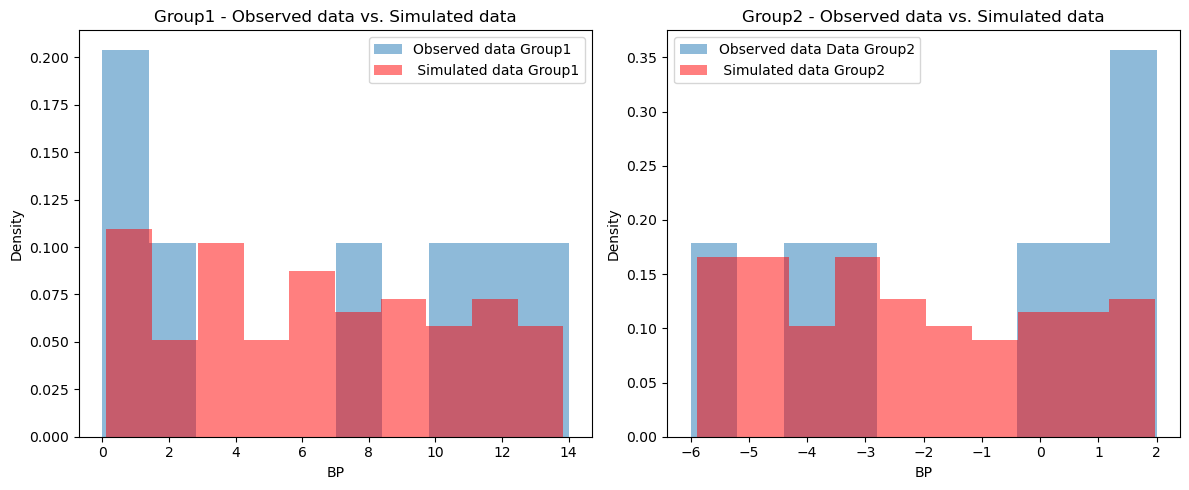

In [46]:
# Generation of random samples
sample_uniform_group1 = np.random.uniform(min_group1, max_group1, 100)
sample_uniform_group2 = np.random.uniform(min_group2, max_group2, 100)


plt.figure(figsize=(12, 5))

# Histogram for Group1 - Observed data vs. Simulated data
plt.subplot(1, 2, 1)
plt.hist(group1, bins=10, density=True, alpha=0.5, label='Observed data Group1')
plt.hist(sample_uniform_group1, bins=10, density=True, alpha=0.5, label=' Simulated data Group1', color='r')
plt.title('Group1 - Observed data vs. Simulated data')
plt.xlabel('BP')
plt.ylabel('Density')
plt.legend()

# Histogram for Group2 - Observed data vs. Simulated data
plt.subplot(1, 2, 2)
plt.hist(group2, bins=10, density=True, alpha=0.5, label='Observed data Data Group2')
plt.hist(sample_uniform_group2, bins=10, density=True, alpha=0.5, label=' Simulated data Group2', color='r')
plt.title('Group2 - Observed data vs. Simulated data')
plt.xlabel('BP')
plt.ylabel('Density')
plt.legend()

plt.tight_layout()
plt.show()

Histograms are slightly different due to the fact that we have much less observed data than simulated data and because in the first group most of the indicators are in the interval 0-1 (beginning of the histogram) and in the second 1-2 (end of the histogram) in simulated data bars are more evenly distributed.

#### Confidence interval for the mean value

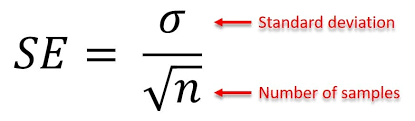

![](https://www.questionpro.com/blog/wp-content/uploads/2022/08/confidence-interval-formula.jpg)

In [47]:
# Confidence interval calculation for Group1
mean_group1 = np.mean(group1)
sem_group1 = stats.sem(group1)
ci_group1 = stats.t.interval(0.95, len(group1)-1, loc=mean_group1, scale=sem_group1)

# Confidence interval calculation for Group2
mean_group2 = np.mean(group2)
sem_group2 = stats.sem(group2)
ci_group2 = stats.t.interval(0.95, len(group2)-1, loc=mean_group2, scale=sem_group2)


print("95% confidence interval for the mean value of Group1: ", ci_group1)
print("95% confidence interval for the mean value of Group2: ", ci_group2)

95% confidence interval for the mean value of Group1:  (1.1560863771384122, 11.986770765718731)
95% confidence interval for the mean value of Group2:  (-4.088292245668366, 1.80257795995408)


#### If the observed groups have the same mean value

We can use t-test and p-value for comparison. This test compares the means of two independent samples and determines whether there are statistically significant differences between them.

In [48]:
#  t-test
t_statistic, p_value = stats.ttest_ind(group1, group2, equal_var=False)

print("t-statistic:", t_statistic)
print("p-value:", p_value)


t-statistic: 3.0620590764682105
p-value: 0.01308402714866483


By t-statistic we can see that the mean of the first group is higher than the mean of the second group.
P-value: 0.0131 is less than the established significance level of 5% (0.05). This means that we have enough statistical evidence to reject the null hypothesis(hypothesis, that there is no connection/correlation).